In [1]:
#Step
# 1. Flood Cause --> Flood Prone Area
# 2. Flood Prone Area's people amounts is limited
# 3. The victims' history provide the number of victim
# 4. The evacuation center have--> the nearby center in a radical distance

In [68]:
# libraries to be used
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
flood = pd.read_csv("flood_cause.csv")
# to change the date from Str to date
if 'Date' in flood.columns: 
    flood['Date'] = pd.to_datetime(flood['Date'])
flood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   No.               33 non-null     int64         
 1   State             33 non-null     object        
 2   District          33 non-null     object        
 3   Date              33 non-null     datetime64[ns]
 4   Flood Cause       33 non-null     object        
 5   Main River Basin  33 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.7+ KB


C:\Users\Asus\AppData\Local\Temp\ipykernel_3464\115393518.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  flood['Date'] = pd.to_datetime(flood['Date'])


In [4]:
#store first after count
grp_district = flood.groupby("District")
dis_list = []
for grp, grp_info in grp_district:
    dis_dict = {}
    dis_dict["District"] = grp
    if "Flood Cause" not in dis_dict:
        dis_dict["Flood Cause"] = grp_info['Flood Cause'].tolist()
    if "Main River Basin" not in dis_dict:
        dis_dict["Main River Basin"] = grp_info['Main River Basin'].tolist()
    dis_dict["Date"] = grp_info['Date'].value_counts().tolist()
    dis_list.append(dis_dict)

dis_df = pd.DataFrame(dis_list)
dis_df

,District,Flood Cause,Main River Basin,Date
0,Batu Pahat,"[Air Laut Pasang, Air Laut Pasang, Air Sungai ...","[-, Sungai Batu Pahat (Parit Warijo); Sungai B...","[1, 1, 1]"
1,Johor Bahru,"[Air Laut Pasang, Air Sungai Melimpah, Air Lau...","[Sungai Pulai (KG LADANG DARAT), Sungai Johor ...","[3, 1]"
2,Kluang,"[Air Sungai Melimpah , Hujan Lebat / Berterusa...",[Sungai Endau (MLNTTP0002 - Kg. Bentong Dalam)...,"[5, 1]"
3,Kota Tinggi,"[Hujan Lebat / Berterusan, Air Sungai Melimpah...","[Sungai Johor (LALGTP0002 - Kg. Temenin, Kg. B...","[6, 2, 2, 1]"
4,Mersing,"[Air Laut Pasang, Air Sungai Melimpah , Hujan ...","[-, -]","[1, 1]"
5,Pontian,"[Air Sungai Melimpah , Hujan Lebat / Berterusa...",[Sungai Pontian Besar (PNBSTP0011 - Kg. Sri Ga...,"[1, 1]"
6,Segamat,"[Air Sungai Melimpah, Air Sungai Melimpah, Air...","[Sungai Muar (Kampung Serdang), Sungai Muar (K...","[4, 1]"


In [12]:
# split flood cause
cause_list=[]

for grp, grp_info in grp_district:
    cause_dict = {}
    cause_dict["District"] = grp

    cause_grp =  grp_district.get_group(grp)
    for index, row in cause_grp.iterrows():
        #the info just look like list but is a str, it will +=, it will separate by character such ad "[" "t" "o"
        temp = row["Flood Cause"].replace("[","").replace("'","").replace("]","")
        temp2 = temp.split(", ")

        for t in temp2 :
            if t not in cause_dict.keys():
                cause_dict[t] = 1
            else:
                cause_dict[t] +=1
    cause_list.append(cause_dict)

cause_df = pd.DataFrame(cause_list)
cause_df

,District,Air Laut Pasang,Air Sungai Melimpah,Hujan Lebat / Berterusan,Air Sungai Melimpah,Saliran Dalaman,Lain-lain,Pembangunan / Pembukaan Tanah / Sampah Sarap,Saliran Dalaman,Struktur / Lintasan Menghalang Laluan Air,Longkang Tersumbat
0,Batu Pahat,3.0,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Johor Bahru,2.0,1,3,1.0,1.0,1.0,1.0,2.0,2.0,1.0
2,Kluang,NaN,6,6,NaN,2.0,NaN,NaN,NaN,NaN,NaN
3,Kota Tinggi,1.0,9,11,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,Mersing,2.0,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Pontian,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Segamat,NaN,3,3,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
causes_dfs = {district: df.dropna(axis=1, how='any') for district, df in cause_df.groupby("District")}
# Iterate through the dictionary of DataFrames
for district, df in causes_dfs.items():
    print(f"District: {district}")
    # Check if the DataFrame is not empty
    if not df.empty:
        for index, row in df.iterrows():
            print(f"  Row {index+1}:")
            num=0
            for column in df.columns:
                print(f"    {num+1} {column}: {row[column]}")
                num+=1
    else:
        print("  No data available for this district.")

District: Batu Pahat
  Row 1:
    1 District: Batu Pahat
    2 Air Laut Pasang: 3.0
    3 Air Sungai Melimpah : 2
    4 Hujan Lebat / Berterusan: 2
District: Johor Bahru
  Row 2:
    1 District: Johor Bahru
    2 Air Laut Pasang: 2.0
    3 Air Sungai Melimpah : 1
    4 Hujan Lebat / Berterusan: 3
    5 Air Sungai Melimpah: 1.0
    6 Saliran Dalaman: 1.0
    7 Lain-lain: 1.0
    8 Pembangunan / Pembukaan Tanah / Sampah Sarap: 1.0
    9 Saliran Dalaman : 2.0
    10 Struktur / Lintasan Menghalang Laluan Air: 2.0
    11 Longkang Tersumbat: 1.0
District: Kluang
  Row 3:
    1 District: Kluang
    2 Air Sungai Melimpah : 6
    3 Hujan Lebat / Berterusan: 6
    4 Saliran Dalaman: 2.0
District: Kota Tinggi
  Row 4:
    1 District: Kota Tinggi
    2 Air Laut Pasang: 1.0
    3 Air Sungai Melimpah : 9
    4 Hujan Lebat / Berterusan: 11
    5 Lain-lain: 1.0
District: Mersing
  Row 5:
    1 District: Mersing
    2 Air Laut Pasang: 2.0
    3 Air Sungai Melimpah : 2
    4 Hujan Lebat / Berterusan: 2


District: Batu Pahat
1


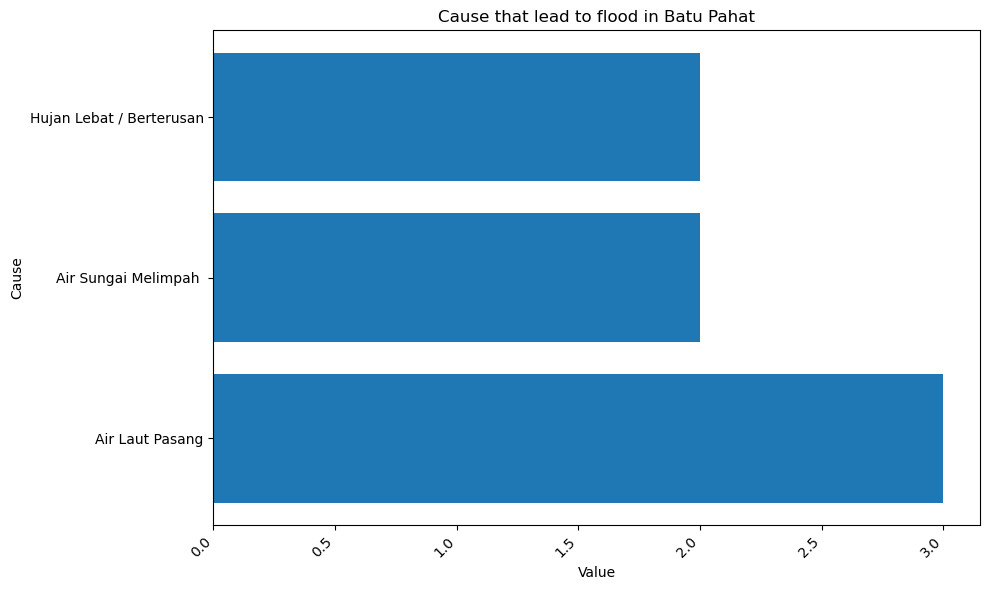

District: Johor Bahru
2


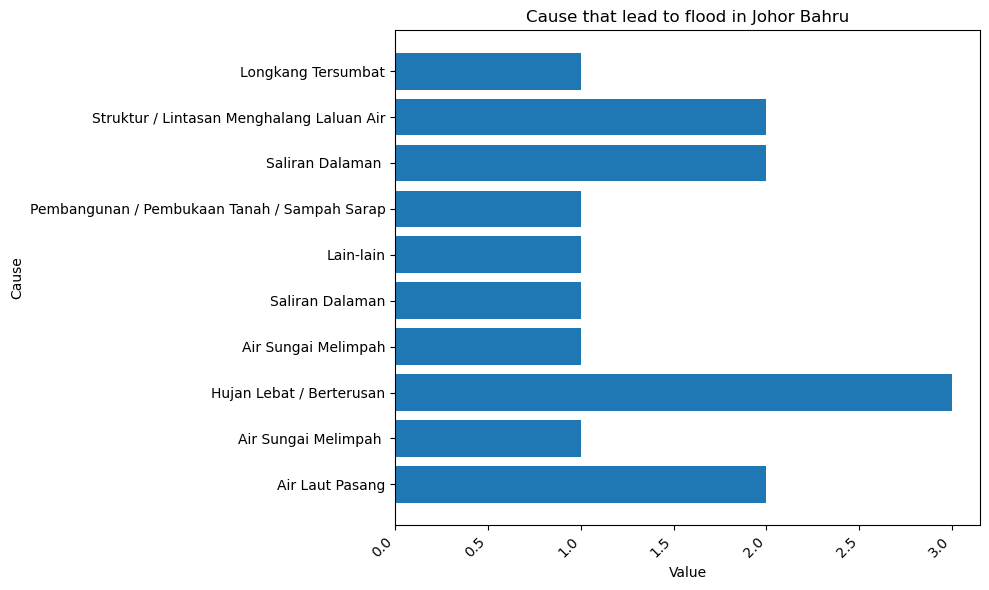

District: Kluang
3


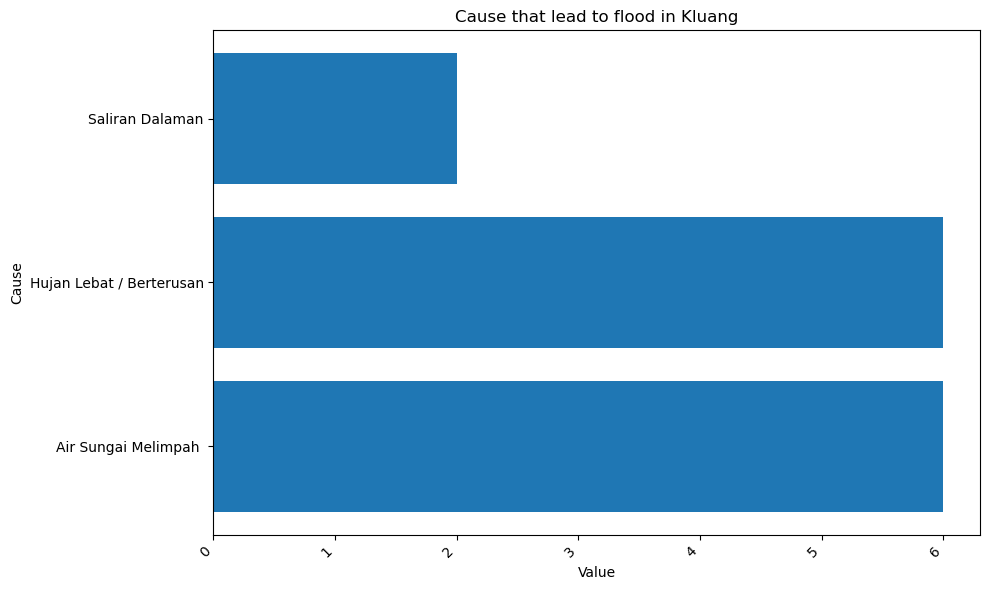

District: Kota Tinggi
4


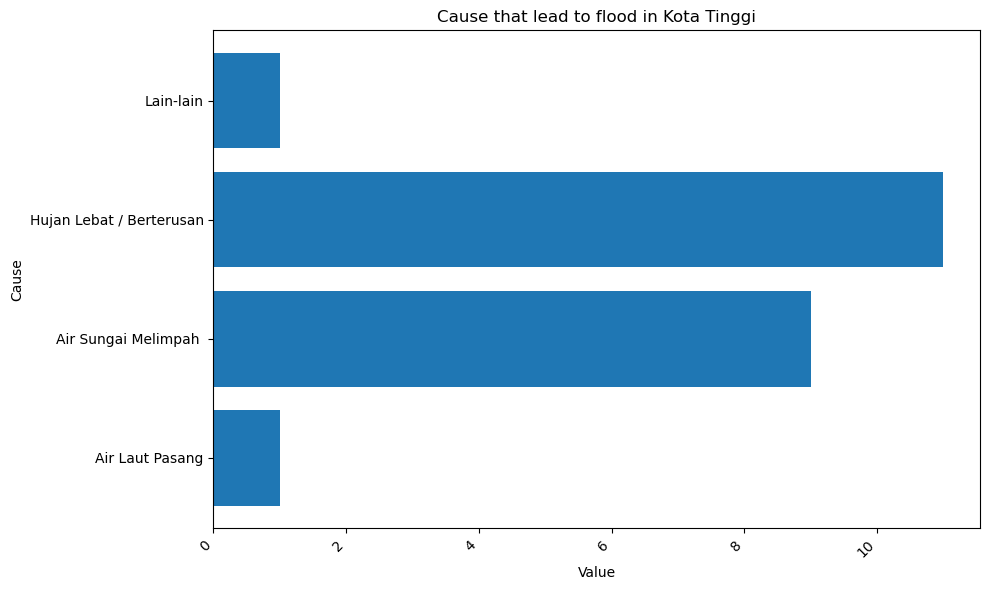

District: Mersing
5


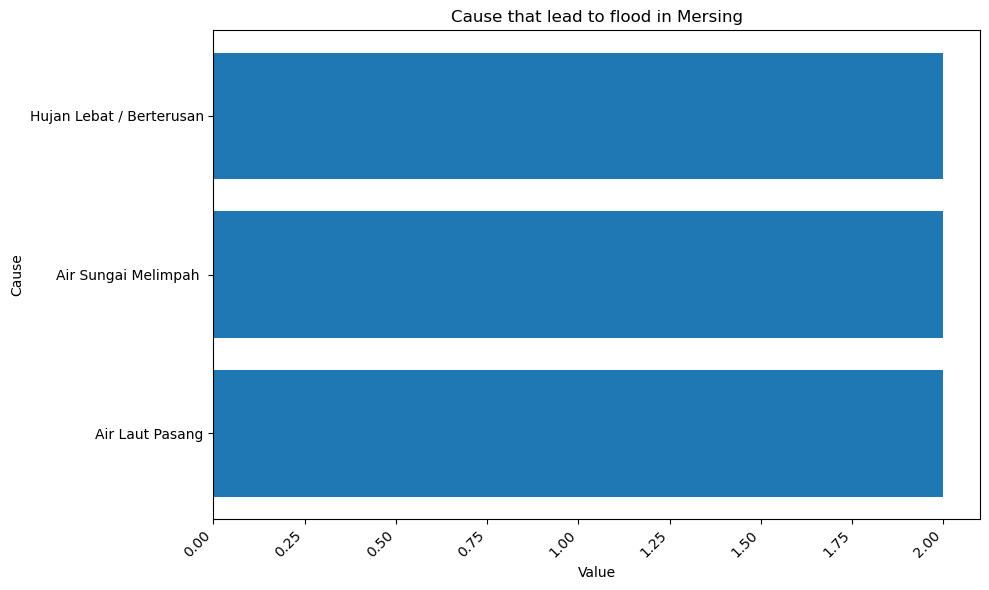

District: Pontian
6


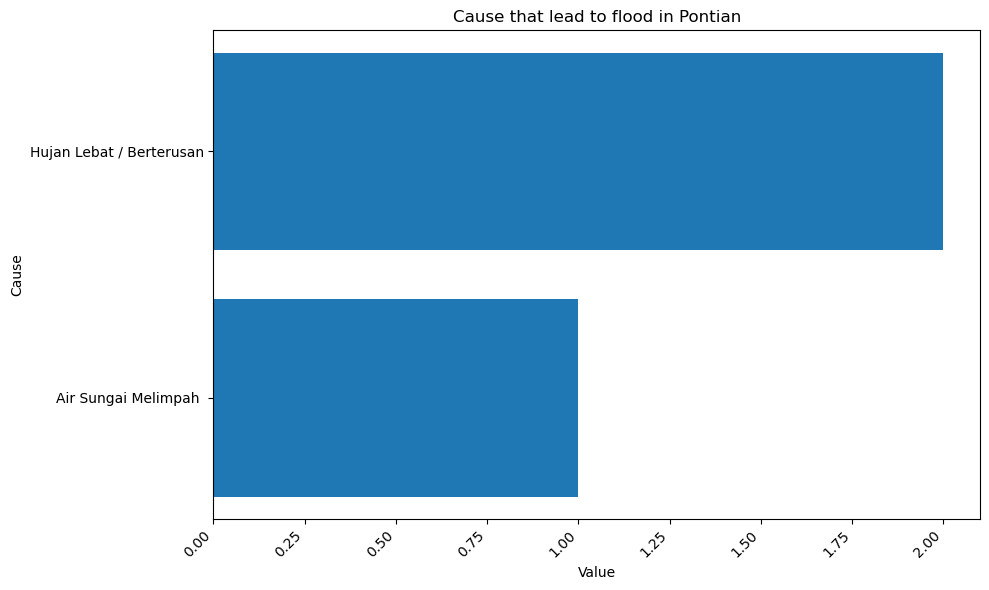

District: Segamat
7


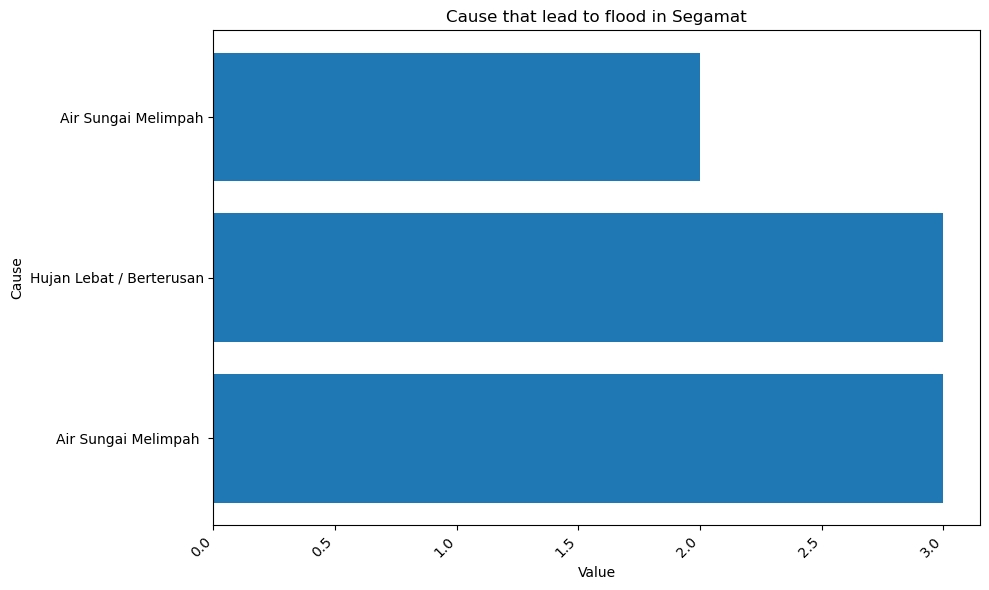

In [97]:
# Iterate through the dictionary of DataFrames
index=1
for district, df in causes_dfs.items():
    print(f"District: {district}")
    # Check if the DataFrame is not empty
    if not df.empty:
        # Prepare data for plotting
        numeric_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()
        if "Main River Basin" in numeric_columns:
            numeric_columns.remove("Main River Basin")  # Remove the Main River Basin column if it exists
        print(index)
        # Create a new DataFrame for plotting
        plot_data = df[numeric_columns].sum().reset_index()
        plot_data.columns = ['Cause', 'Value']  # Rename columns for clarity
        
        # Plotting
        plt.figure(figsize=(10, 6))
        plt.barh(plot_data['Cause'], plot_data['Value'])
        plt.title(f"Cause that lead to flood in {district}")
        plt.ylabel("Cause")
        plt.xlabel("Value")
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
        plt.tight_layout()  # Adjust layout to fit labels
        plt.savefig(f"Cause {index}.png") 
        plt.show()
        plt.close() 
        index+=1
    else:
        print("  No data available for this district.")

In [40]:
# split main river basin 

river_list=[]

for grp, grp_info in grp_district:
    river_dict = {}
    river_dict["Main River Basin"] = grp

    river_grp =  grp_district.get_group(grp)
    for index, row in river_grp.iterrows():
#           Sungai Johor (LALGTP0002 - Kg. Temenin, Kg. Batu 4)
#         ; Sungai Johor (Desa Makmur)
#         ; Sungai Johor (Taman Kota Mas)
#         ; Sungai Johor (Kg. Paya Lebar)
#         ; Sungai Johor (Taman Desa Sejahtera)
        temp = row["Main River Basin"].replace("[","").replace("'","").replace("]","")
        temp2 = temp.split("; ")
        for t in temp2 :
            if t not in river_dict.keys():
                river_dict[t] = 1
            else:
                river_dict[t] +=1
            
    river_list.append(river_dict)

river_df = pd.DataFrame(river_list)
river_df = river_df.drop(columns=['-'])
river_df

,Main River Basin,Sungai Batu Pahat (Parit Warijo),Sungai Batu Pahat (Parit Rahiban),Sungai Batu Pahat (Parit Simis),Sungai Batu Pahat (SMBGTP0001 - Parit Jambul Laut),"PT Botak (Pt. Hamid, Pt. Semarang, Pt. Lapis Semarang, Pt. K)",Sungai Pulai (KG LADANG DARAT),Sungai Johor (Kampung Paya),Sungai Johor (Kampung Sg Serai),Sungai Johor (KG SENTOSA DAMAI),...,Sungai Johor (PMDITP0002 - Taman Aman),Sungai Johor (PMDITP0001 - Taman Mawai),Sungai Johor (TLORTP0003 - Kg. Baru Sg Mas),Sungai Pontian Besar (PNBSTP0011 - Kg. Sri Gambut),Sungai Pulai (Kg. Sg. Moleh),Sungai Muar (Kampung Serdang),Sungai Muar (Kampung Pogoh Tengah),Sungai Muar (MUARTP0037 - Kg. Kuala Paya),"Sungai Muar (Kampung Batu Lima, Buloh Kasap)",Sungai Muar (PLNGTP0003 - Kg. Mensudut Lama)
0,Batu Pahat,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Johor Bahru,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kluang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Kota Tinggi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mersing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Pontian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
6,Segamat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0


In [47]:
river_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 57 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Main River Basin                                                   7 non-null      object 
 1   Sungai Batu Pahat (Parit Warijo)                                   1 non-null      float64
 2   Sungai Batu Pahat (Parit Rahiban)                                  1 non-null      float64
 3   Sungai Batu Pahat (Parit Simis)                                    1 non-null      float64
 4   Sungai Batu Pahat (SMBGTP0001 - Parit Jambul Laut)                 1 non-null      float64
 5   PT Botak (Pt. Hamid, Pt. Semarang, Pt. Lapis Semarang, Pt. K)      1 non-null      float64
 6   Sungai Pulai (KG LADANG DARAT)                                     1 non-null      float64
 7   Sungai Johor (Kampung Paya)   

In [55]:
batu_pahat_df = river_df[river_df["Main River Basin"].str.contains("Batu Pahat", case=False, na=False)]

# Drop columns that contain NaN values
batu_pahat_df = batu_pahat_df.dropna(axis=1, how='any')

# Display the resulting DataFrame
batu_pahat_df

,Main River Basin,Sungai Batu Pahat (Parit Warijo),Sungai Batu Pahat (Parit Rahiban),Sungai Batu Pahat (Parit Simis),Sungai Batu Pahat (SMBGTP0001 - Parit Jambul Laut),"PT Botak (Pt. Hamid, Pt. Semarang, Pt. Lapis Semarang, Pt. K)"
0,Batu Pahat,1.0,1.0,1.0,1.0,1.0


In [67]:
# Create a dictionary to hold separate DataFrames for each district after dropping NaNs
#to remove Nan
district_dfs = {district: df.dropna(axis=1, how='any') for district, df in river_df.groupby("Main River Basin")}


In [83]:
# Iterate through the dictionary of DataFrames
for district, df in district_dfs.items():
    print(f"District: {district}")
    # Check if the DataFrame is not empty
    if not df.empty:
        for index, row in df.iterrows():
            print(f"  Row {index+1}:")
            num=0
            for column in df.columns:
                value = row[column]
                # it have the main river basin col, the we use this to remove it
                if isinstance(value, (int, float)): # Check if the value is numeric (int or float)
                    print(f"    {num}. {column}: {int(value)}")  # Convert to int
                num += 1
    else:
        print("  No data available for this district.")


District: Batu Pahat
  Row 1:
    1. Sungai Batu Pahat (Parit Warijo): 1
    2. Sungai Batu Pahat (Parit Rahiban): 1
    3. Sungai Batu Pahat (Parit Simis): 1
    4. Sungai Batu Pahat (SMBGTP0001 - Parit Jambul Laut): 1
    5. PT Botak (Pt. Hamid, Pt. Semarang, Pt. Lapis Semarang, Pt. K): 1
District: Johor Bahru
  Row 2:
    1. Sungai Pulai (KG LADANG DARAT): 1
    2. Sungai Johor (Kampung Paya): 1
    3. Sungai Johor (Kampung Sg Serai): 1
    4. Sungai Johor (KG SENTOSA DAMAI): 1
    5. Sungai Johor (KG SENTOSA BARAT): 1
    6. Sungai Johor (TRAMTP0005 - Kg. Dagang, Sg. Tiram): 1
    7. Sungai Johor (TRAMTP0004 - Kg. Sg. Tiram, Batu 18, Batu 19, Batu): 1
    8. Sungai Johor (LORONG MAK PIAH): 1
District: Kluang
  Row 3:
    1. Sungai Endau (MLNTTP0002 - Kg. Bentong Dalam): 1
    2. Sungai Endau (MLNTTP0006 - Jalan Batu Pahat (Petron Taman Berlia): 1
    3. Sungai Endau (KHNGTP0003 - Kg. Sri Lukut): 1
    4. Sungai Endau (SMKCTP0010 - Kg. Tanah Runtuh): 1
    5. Sungai Endau (MGKBTP001

District: Batu Pahat
1


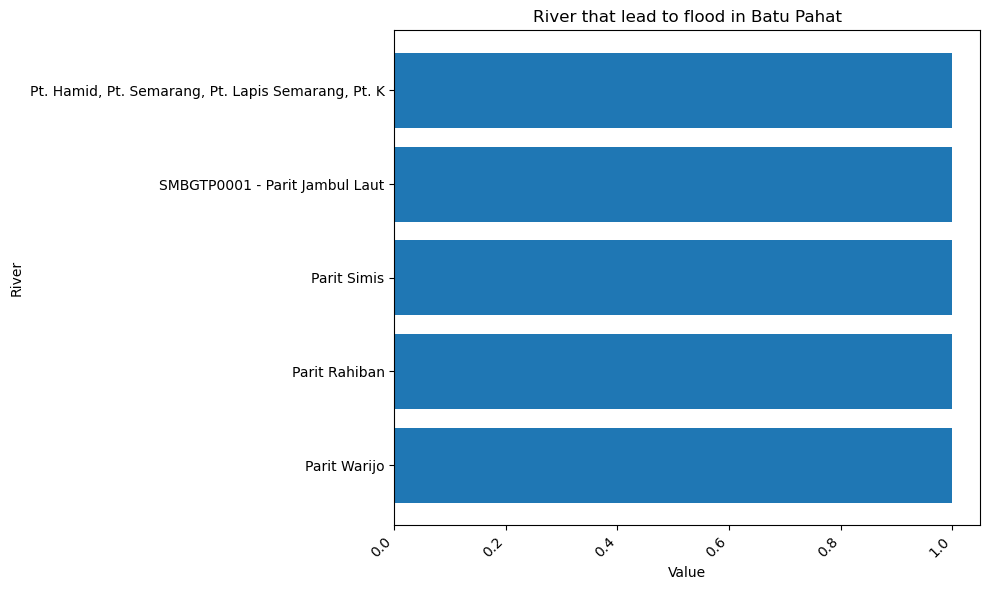

District: Johor Bahru
2


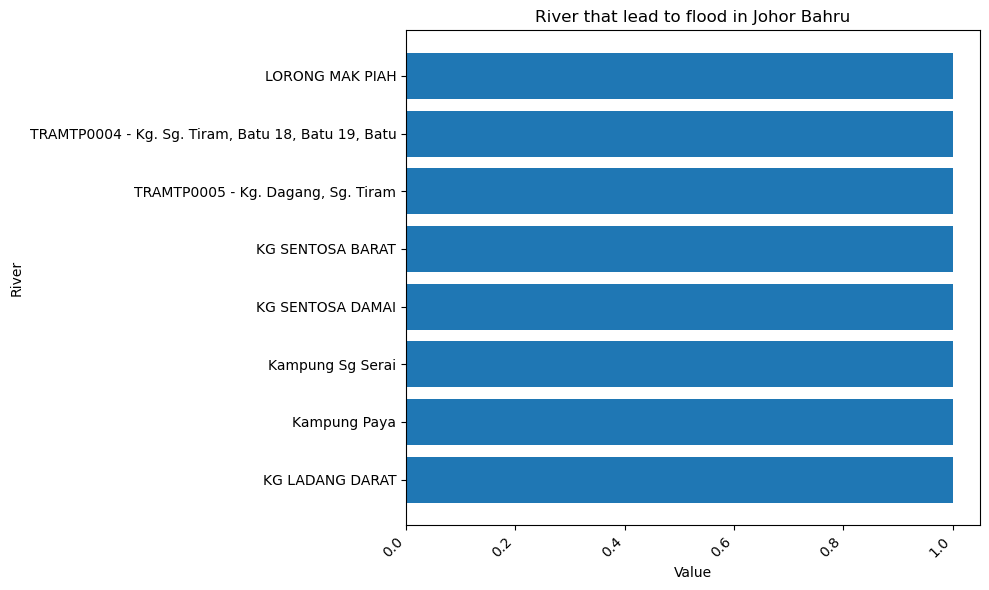

District: Kluang
3


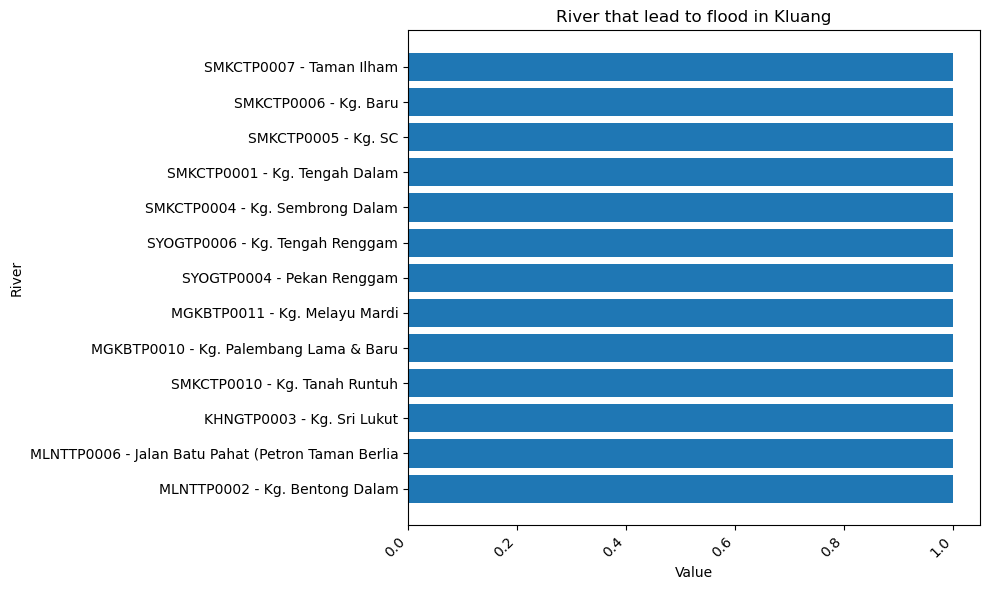

District: Kota Tinggi
4


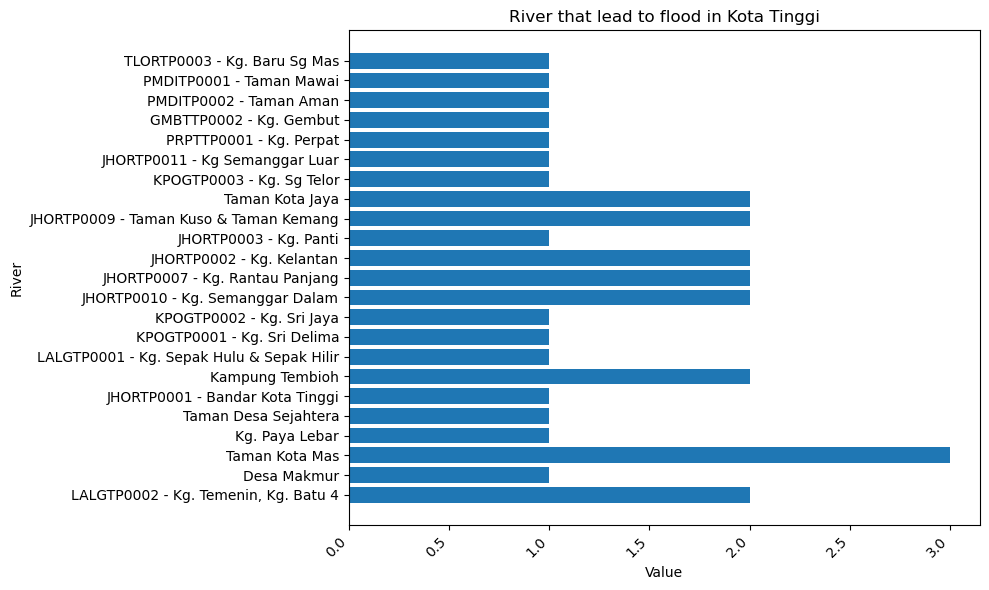

District: Mersing
5


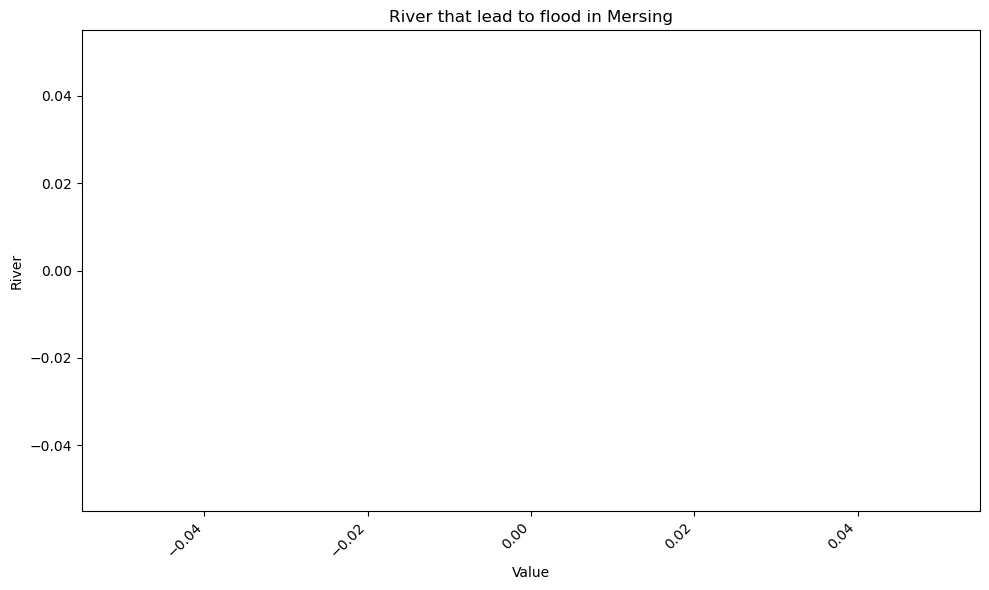

District: Pontian
6


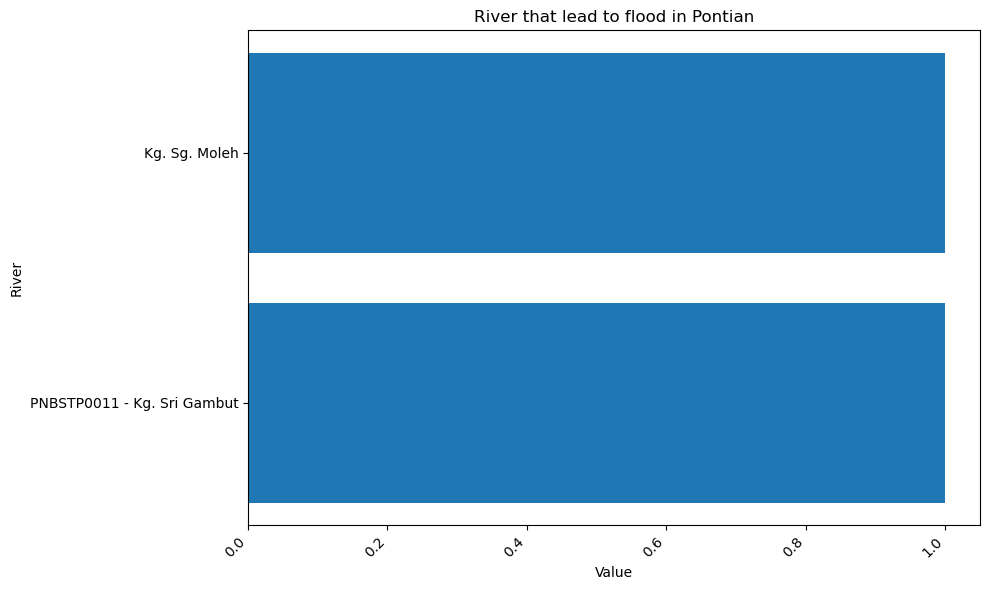

District: Segamat
7


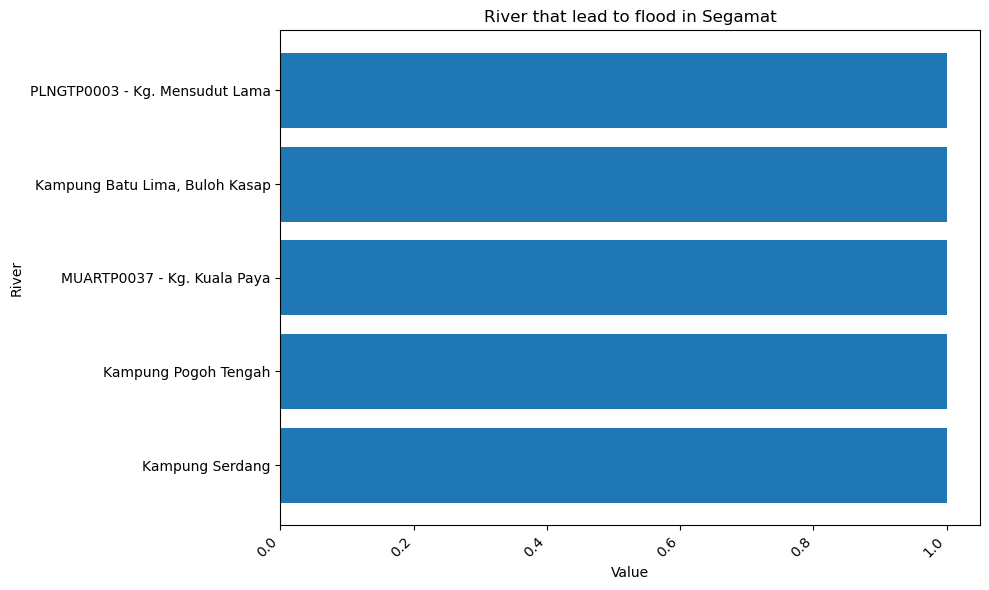

In [94]:
# Iterate through the dictionary of DataFrames
index=1
for district, df in district_dfs.items():
    print(f"District: {district}")
    # Check if the DataFrame is not empty
    if not df.empty:
        # Prepare data for plotting
        numeric_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()
        if "Main River Basin" in numeric_columns:
            numeric_columns.remove("Main River Basin")  # Remove the Main River Basin column if it exists
        print(index)
        # Create a new DataFrame for plotting
        plot_data = df[numeric_columns].sum().reset_index()
        plot_data.columns = ['River', 'Value']  # Rename columns for clarity
        
        # Extract only the values in parentheses from the River names
        plot_data['River'] = plot_data['River'].str.extract(r'\((.*?)\)')[0].fillna(plot_data['River'])
        
        # Plotting
        plt.figure(figsize=(10, 6))
        plt.barh(plot_data['River'], plot_data['Value'])
        plt.title(f"River that lead to flood in {district}")
        plt.ylabel("River")
        plt.xlabel("Value")
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
        plt.tight_layout()  # Adjust layout to fit labels
        plt.savefig(f"Figure {index}.png") 
        plt.show()
        plt.close() 
        index+=1
    else:
        print("  No data available for this district.")